In [7]:
import pymc as pm
from scipy import stats
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# Homework #4 Part I: Fit this model using HMC in `PyMC`

For the model specification example considered in "Metropolis within Gibbs" above...


## Provide posterior analysis for this model using "default" `PyMC`

- Don't try to do "Metropolis within Gibbs" `in PyMC` -- you can't -- use the default HMC sampler
- You can do this without knowing what HMC is: you've already previously used HMC with `PyMC`; and, you can go get the distributions you need [here...](https://www.pymc.io/projects/docs/en/stable/api/distributions.html)
- ***Explore and describe the sample sizes needed to support inference regarding the `df` parameter $(\nu)$***

*Ahem...*

- Is it eating you up inside that you don't know what HMC actualy is?
- Do you hate just using something without knowing what it is?<br>Or what you're even doing when you use it?

*Well then, my friends, have I got the cure for you!*<br>All **you** must **do** is listen **to** someone **who** will re**view** for **you** the next slides **few**!



/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([[<Axes: title={'center': 'loc'}>, <Axes: title={'center': 'loc'}>],
       [<Axes: title={'center': 'df'}>, <Axes: title={'center': 'df'}>],
       [<Axes: title={'center': 'scale'}>,
        <Axes: title={'center': 'scale'}>]], dtype=object)

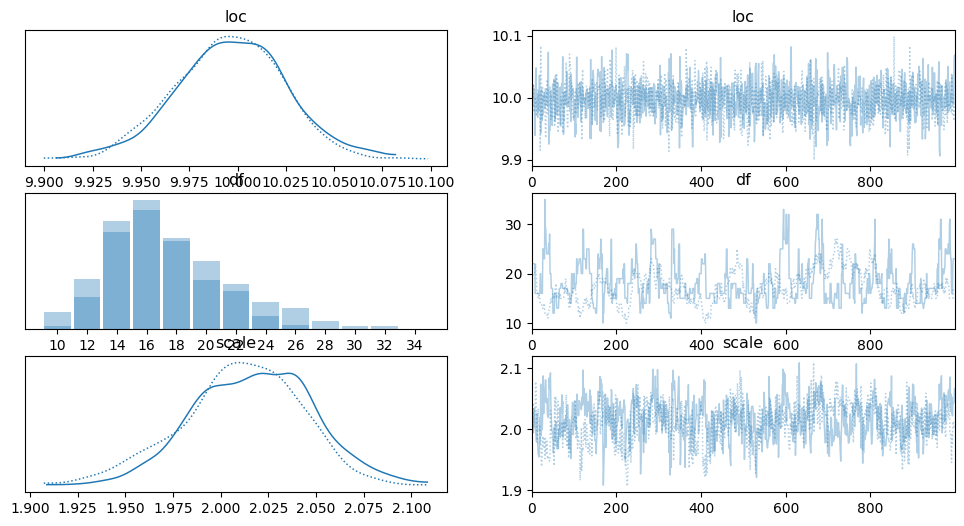

In [3]:
#Change the sample size to 5000
n,loc_true,scale_true,df_true = 5000,10,2,15
x = stats.t(df=df_true,loc = loc_true, scale = scale_true).rvs(n)

with pm.Model() as t_norm_half_norm_discrete:
  loc = pm.Normal("loc", mu = 0, sigma = 10)
  scale = pm.HalfNormal("scale",sigma = 5)
  df = pm.DiscreteUniform("df", lower=1,upper=100)
  x_obs = pm.StudentT("likelihood", mu = loc,sigma = scale, nu = df, observed = x)

with t_norm_half_norm_discrete:
  idata = pm.sample()

az.plot_trace(idata)

array([[<Axes: title={'center': 'loc'}>, <Axes: title={'center': 'loc'}>],
       [<Axes: title={'center': 'df'}>, <Axes: title={'center': 'df'}>],
       [<Axes: title={'center': 'scale'}>,
        <Axes: title={'center': 'scale'}>]], dtype=object)

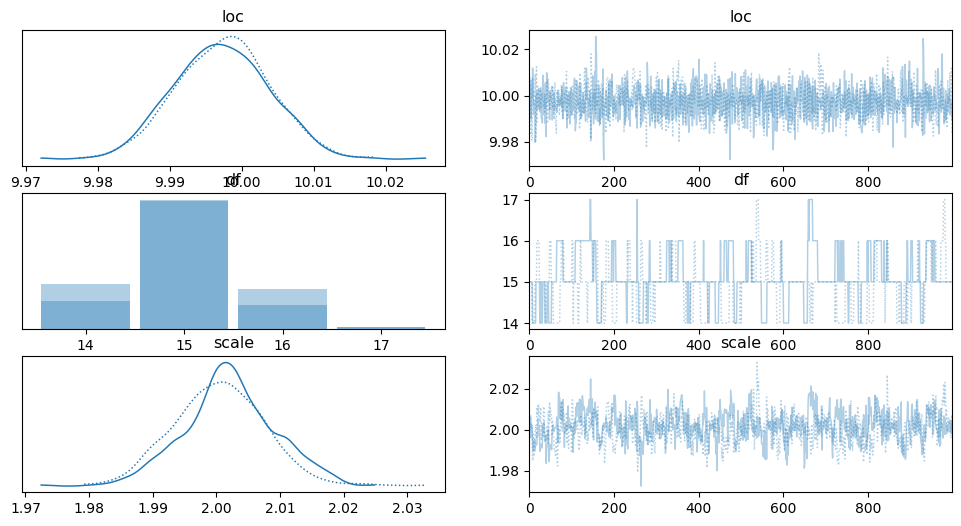

In [4]:
#Changing sample size to 10k
n,loc_true,scale_true,df_true = 100000,10,2,15
x = stats.t(df=df_true,loc = loc_true, scale = scale_true).rvs(n)

with pm.Model() as t_norm_half_norm_discrete:
  loc = pm.Normal("loc", mu = 0, sigma = 10)
  scale = pm.HalfNormal("scale",sigma = 5)
  df = pm.DiscreteUniform("df", lower=1,upper=100)
  x_obs = pm.StudentT("likelihood", mu = loc,sigma = scale, nu = df, observed = x)

with t_norm_half_norm_discrete:
  idata = pm.sample()

az.plot_trace(idata)

# Homework #4 Part II: HMC Diagnostics

- Return to your posterior analysis in "Homework #4 Part I" and
report on (a) ***effective sample sizes***; (b) ***chain convergence measures***; (c) ***divergences***; (d) ***Metropolis-Hastings acceptance rates*** [see below for how to access these]; and (e) any other warnings or concers provided by `PyMC`

- Now examine the [Eight Schools](https://github.com/pointOfive/STA410_W24_StatisticalComputation/blob/main/Week3/STA410_W24_Week3_Demo_HMCwithPyMC.ipynb) example PyMC model and outputted results
    - Provide an analogous report regarding (a)-(e) above for the "centered" and "uncentered" Eight Schools models
        - *Hint: for (d) see `fit_C.sample_stats.acceptance_rate.values.flatten()` and `fit_NC.sample_stats.acceptance_rate.values.flatten()` and in the Eight Schools example*
    - From the perspective of ***curvature*** of the ***energy function*** (that is, how rapidly the ***log joint posterior distribution density*** changes for different values of its ***random variable (parameters)*** and the effectiveness of the ***HMC*** algorithm, explain why the "uncentered" paramterization of the model performs better than the "centered" parameterization
        - *Hint: see the previous two slides...*
- Review [this](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html#model-checking) and [that](https://discourse.pymc.io/t/about-nuts-sampling-and-energy-plot/831) discussing the ***diagnostic plot*** which compares the ***observed energy proposal distribution*** versus the ***empirical energy distribution*** of the generated HMC samples
    - Use the code on the next slide to provide and interpret the ***diagnostic plot*** assessing ***energy proposals*** versus the empirical ***energy*** distribution to compare and contrast the "centered" and "uncentered" Eight Schools models in relation to you previous comparision of these two model parameterization in terms of ***energy function curvature*** and the effectiveness of the ***HMC*** algorithm... does this diagnostic support your previous conclusions in these regards?




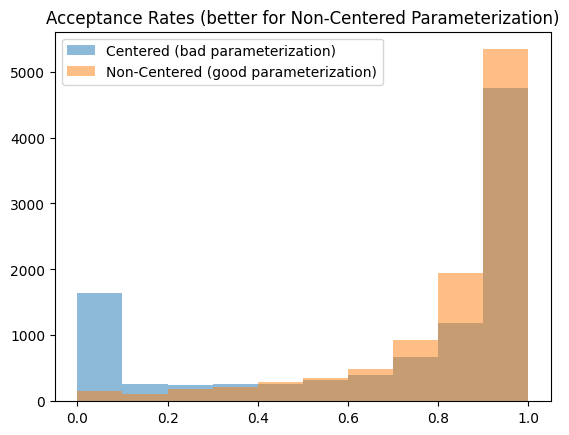

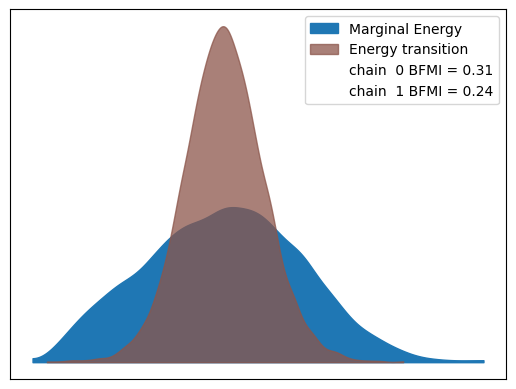

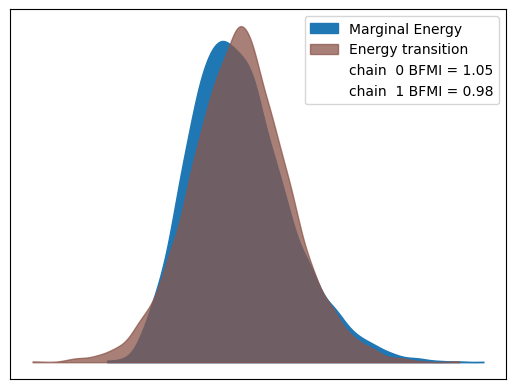

In [8]:
#Following instruction copy the code from Github
import numpy as np
J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])

with pm.Model() as Centered_eight:

    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)

    theta = pm.Normal("theta", mu=mu, sigma=tau, shape=J)

    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)


 #Copy code from page "Eight School"
SEED = [20100420, 20134234] # random seeds for each of two run HMC chains
with Centered_eight:
    fit_C = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                      return_inferencedata=True, idata_kwargs={"log_likelihood": True})

with pm.Model() as NonCentered_eight:

    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)
    theta_tilde = pm.Normal("theta_t", mu=0, sigma=1, shape=J)

    theta = pm.Deterministic("theta", mu + tau * theta_tilde)

    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)

with NonCentered_eight:
    fit_NC = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                       return_inferencedata=True, idata_kwargs={"log_likelihood": True})

#Following the hint copy the following code from "Eight Schools"
plt.hist(fit_C.sample_stats.acceptance_rate.values.flatten(), alpha=0.5,
         label='Centered (bad parameterization)');
plt.hist(fit_NC.sample_stats.acceptance_rate.values.flatten(), alpha=0.5,
         label='Non-Centered (good parameterization)');
plt.title('Acceptance Rates (better for Non-Centered Parameterization)'); plt.legend();
az.plot_energy(fit_C);
az.plot_energy(fit_NC);

Report on following questions:

(a)Effective sample sizes:
From part 1 we observed that, when decrease the sample size to 5000 the choices for the degree of freedom prior speads out, but change back to 100000 the chices for degree of freedom prior are more centered, which shows 15 degree of freedom is the best choice.Other prior parameters seem stable(don't have huge difference when we switching sample sizes.

(b)Chain convergence measures:From the BFMI index which calculated and plotted using the code provided in page "Eight School", we can see that the as BFMI is bounded near 1 for chain 0 and chain 1, we have better match between marginal energy and energy transition with the uncentered model. In regard of curvature, we observed from the plot above, that the uncentered model plot has less curvature comparing to centered model and we can conclude that uncentered model help deal with curvature problems.

(c)Divergences: From the data generated by code, we see that for centered model chain 0 and 1 have 71 and 283 divergence during the sampling, which is way more than uncentered model.

(d)Metropolis-Hastings acceptance rates:From the histogram we can see clearly that uncentered model has higher acceptance rate and chance.